In [2]:
# importacion general de librerias y de visualizacion (matplotlib y seaborn)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

plt.style.use('default') # haciendo los graficos un poco mas bonitos en matplotlib
#plt.rcParams['figure.figsize'] = (20, 10)

sns.set(style="whitegrid") # seteando tipo de grid en seaborn

In [3]:
plt.rc('figure',dpi=100);

In [4]:
postulaciones = pd.read_csv("../Data/datos_navent_fiuba/fiuba_4_postulaciones.csv");
postulaciones.head()

,idaviso,idpostulante,fechapostulacion
0,1112257047,NM5M,2018-01-15 16:22:34
1,1111920714,NM5M,2018-02-06 09:04:50
2,1112346945,NM5M,2018-02-22 09:04:47
3,1112345547,NM5M,2018-02-22 09:04:59
4,1112237522,5awk,2018-01-25 18:55:03


In [5]:
avisos = pd.read_csv("../Data/datos_navent_fiuba/fiuba_6_avisos_detalle.csv");
avisos.head()

,idaviso,idpais,titulo,descripcion,nombre_zona,ciudad,mapacalle,tipo_de_trabajo,nivel_laboral,nombre_area,denominacion_empresa
0,8725750,1,VENDEDOR/A PROVINCIA DE SANTA FE,<p><strong><strong>Empresa:</strong></strong> ...,Gran Buenos Aires,NaN,NaN,Full-time,Senior / Semi-Senior,Comercial,VENTOR
1,17903700,1,Enfermeras,<p>Solicitamos para importante cadena de farma...,Gran Buenos Aires,NaN,NaN,Full-time,Senior / Semi-Senior,Salud,Farmacias Central Oeste
2,1000150677,1,Chofer de taxi,<p>TE GUSTA MANEJAR? QUERES GANAR PLATA HACIEN...,Capital Federal,NaN,Empedrado 2336,Full-time,Senior / Semi-Senior,Transporte,FAMITAX SRL
3,1000610287,1,CHOFER DE CAMIONETA BAHIA BLANCA - PUNTA ALTA,<p><strong>Somos una empresa multinacional que...,Gran Buenos Aires,NaN,NaN,Full-time,Senior / Semi-Senior,Transporte,Wurth Argentina S.A
4,1000872556,1,Operarios de Planta - Rubro Electrodomésticos,<p><strong>OPERARIOS DE PLANTA</strong></p><p>...,Gran Buenos Aires,NaN,NaN,Full-time,Senior / Semi-Senior,Producción,ELECTRO OUTLET SRL


In [6]:
avisos.drop(['descripcion','nombre_zona','ciudad','mapacalle','titulo','denominacion_empresa'],axis=1,inplace=True);
avisos.head()

,idaviso,idpais,tipo_de_trabajo,nivel_laboral,nombre_area
0,8725750,1,Full-time,Senior / Semi-Senior,Comercial
1,17903700,1,Full-time,Senior / Semi-Senior,Salud
2,1000150677,1,Full-time,Senior / Semi-Senior,Transporte
3,1000610287,1,Full-time,Senior / Semi-Senior,Transporte
4,1000872556,1,Full-time,Senior / Semi-Senior,Producción


In [7]:
postulaciones_con_aviso=pd.merge(postulaciones, avisos, on='idaviso',how='inner');
postulaciones_con_aviso.head()

,idaviso,idpostulante,fechapostulacion,idpais,tipo_de_trabajo,nivel_laboral,nombre_area
0,1112257047,NM5M,2018-01-15 16:22:34,1,Part-time,Otro,Atención al Cliente
1,1112257047,1kJqGb,2018-01-15 10:23:11,1,Part-time,Otro,Atención al Cliente
2,1112257047,eOE9Rr,2018-01-15 10:42:07,1,Part-time,Otro,Atención al Cliente
3,1112257047,Zrx8Xz,2018-01-30 10:18:14,1,Part-time,Otro,Atención al Cliente
4,1112257047,ZrKNQY,2018-01-16 17:19:38,1,Part-time,Otro,Atención al Cliente


In [8]:
postulantes_genero_y_edad=pd.read_csv("../Data/datos_navent_fiuba/fiuba_2_postulantes_genero_y_edad.csv");
postulaciones_completas=pd.merge(postulaciones_con_aviso, postulantes_genero_y_edad, on='idpostulante',how='inner');
postulaciones_completas.head()

,idaviso,idpostulante,fechapostulacion,idpais,tipo_de_trabajo,nivel_laboral,nombre_area,fechanacimiento,sexo
0,1112257047,NM5M,2018-01-15 16:22:34,1,Part-time,Otro,Atención al Cliente,1970-12-03,FEM
1,1111920714,NM5M,2018-02-06 09:04:50,1,Part-time,Senior / Semi-Senior,Telemarketing,1970-12-03,FEM
2,1112346945,NM5M,2018-02-22 09:04:47,1,Full-time,Senior / Semi-Senior,Telemarketing,1970-12-03,FEM
3,1112345547,NM5M,2018-02-22 09:04:59,1,Full-time,Senior / Semi-Senior,Telemarketing,1970-12-03,FEM
4,1112257047,1kJqGb,2018-01-15 10:23:11,1,Part-time,Otro,Atención al Cliente,1984-04-21,FEM


In [9]:
postulaciones_completas['fechanacimiento']=pd.to_datetime(postulaciones_completas['fechanacimiento'], errors = 'coerce')
postulaciones_completas['fechapostulacion']=postulaciones_completas['fechapostulacion'].astype('datetime64[ns]');
postulaciones_completas.dtypes

idaviso                      int64
idpostulante                object
fechapostulacion    datetime64[ns]
idpais                       int64
tipo_de_trabajo             object
nivel_laboral               object
nombre_area                 object
fechanacimiento     datetime64[ns]
sexo                        object
dtype: object

In [10]:
postulaciones_completas['edad']=postulaciones_completas['fechapostulacion']-postulaciones_completas['fechanacimiento'];
postulaciones_completas['edad']=pd.TimedeltaIndex(postulaciones_completas['edad']).days;
postulaciones_completas['edad']=np.floor(postulaciones_completas['edad']/365);
postulaciones_completas.head()

,idaviso,idpostulante,fechapostulacion,idpais,tipo_de_trabajo,nivel_laboral,nombre_area,fechanacimiento,sexo,edad
0,1112257047,NM5M,2018-01-15 16:22:34,1,Part-time,Otro,Atención al Cliente,1970-12-03,FEM,47.0
1,1111920714,NM5M,2018-02-06 09:04:50,1,Part-time,Senior / Semi-Senior,Telemarketing,1970-12-03,FEM,47.0
2,1112346945,NM5M,2018-02-22 09:04:47,1,Full-time,Senior / Semi-Senior,Telemarketing,1970-12-03,FEM,47.0
3,1112345547,NM5M,2018-02-22 09:04:59,1,Full-time,Senior / Semi-Senior,Telemarketing,1970-12-03,FEM,47.0
4,1112257047,1kJqGb,2018-01-15 10:23:11,1,Part-time,Otro,Atención al Cliente,1984-04-21,FEM,33.0


In [11]:
postulaciones_completas.dtypes

idaviso                      int64
idpostulante                object
fechapostulacion    datetime64[ns]
idpais                       int64
tipo_de_trabajo             object
nivel_laboral               object
nombre_area                 object
fechanacimiento     datetime64[ns]
sexo                        object
edad                       float64
dtype: object

In [12]:
#18-24,25-34,35-49,50-65
def rango_etario(x):
    if(x>=18 and x<=24):
        return '18-24'
    elif(x>=25 and x<=34):
        return '25-34'
    elif(x>=35 and x<=49):
        return '35-49'
    elif(x>=50 and x<=65):
        return '50-65'
    else:
        return 'error'
postulaciones_completas['18-24']=( (postulaciones_completas['edad']>=18) & (postulaciones_completas['edad']<=24) );
postulaciones_completas['25-34']=( (postulaciones_completas['edad']>=25) & (postulaciones_completas['edad']<=34) );
postulaciones_completas['35-49']=( (postulaciones_completas['edad']>=35) & (postulaciones_completas['edad']<=49) );
postulaciones_completas['50-65']=( (postulaciones_completas['edad']>=50) & (postulaciones_completas['edad']<=65) );
postulaciones_completas['rango']=postulaciones_completas['edad'].apply(lambda x:rango_etario(x))
postulaciones_completas['edad']=postulaciones_completas['edad'].fillna(0).astype(int);
postulaciones_completas['edad_string']=postulaciones_completas['edad'].apply(lambda x: str(x));
postulaciones_completas.head()

,idaviso,idpostulante,fechapostulacion,idpais,tipo_de_trabajo,nivel_laboral,nombre_area,fechanacimiento,sexo,edad,18-24,25-34,35-49,50-65,rango,edad_string
0,1112257047,NM5M,2018-01-15 16:22:34,1,Part-time,Otro,Atención al Cliente,1970-12-03,FEM,47,False,False,True,False,35-49,47
1,1111920714,NM5M,2018-02-06 09:04:50,1,Part-time,Senior / Semi-Senior,Telemarketing,1970-12-03,FEM,47,False,False,True,False,35-49,47
2,1112346945,NM5M,2018-02-22 09:04:47,1,Full-time,Senior / Semi-Senior,Telemarketing,1970-12-03,FEM,47,False,False,True,False,35-49,47
3,1112345547,NM5M,2018-02-22 09:04:59,1,Full-time,Senior / Semi-Senior,Telemarketing,1970-12-03,FEM,47,False,False,True,False,35-49,47
4,1112257047,1kJqGb,2018-01-15 10:23:11,1,Part-time,Otro,Atención al Cliente,1984-04-21,FEM,33,False,True,False,False,25-34,33


In [13]:
areas_por_edad=postulaciones_completas.groupby('nombre_area', as_index=False).agg({'edad':'mean', 'idpostulante':'count'});
promedio_edad=postulaciones_completas['edad'].mean()
areas_por_edad['distancia_del_promedio']=np.abs(promedio_edad-areas_por_edad['edad']);
areas_por_edad.sort_values(by='distancia_del_promedio',ascending=False,inplace=True);
areas_por_edad.head()

,nombre_area,edad,idpostulante,distancia_del_promedio
158,Urbanismo,38.333333,12,10.094398
46,Dirección de Obra,35.284053,3010,7.045118
70,Gerencia / Dirección General,35.153573,6186,6.914637
113,Operaciones,34.715455,977,6.476520
107,Medio Ambiente,34.115468,459,5.876533


In [14]:
#filtramos areas con mas de 500 postulaciones.
areas_por_edad = areas_por_edad[areas_por_edad['idpostulante'] > 500]
areas_por_edad.rename(columns={'idpostulante':'cantidad_postulantes'}, inplace=True)
areas_por_edad.head(20)

,nombre_area,edad,cantidad_postulantes,distancia_del_promedio
46,Dirección de Obra,35.284053,3010,7.045118
70,Gerencia / Dirección General,35.153573,6186,6.914637
113,Operaciones,34.715455,977,6.476520
100,Liderazgo de Proyecto,33.449829,3219,5.210894
83,Ingeniería Electromecánica,33.241509,2385,5.002574
109,Mineria/Petroleo/Gas,33.019956,4109,4.781021
82,Ingeniería Civil,32.884871,4369,4.645935
23,Capacitación,32.597630,4389,4.358695
118,Pasantía / Trainee,23.903390,6666,4.335545
137,Seguridad Industrial,32.545241,851,4.306305


In [15]:
post_filtrada_desiguales=postulaciones_completas[postulaciones_completas['nombre_area'].isin(areas_por_edad.iloc[:20].nombre_area.values)];
post_filtrada_desiguales.head()

,idaviso,idpostulante,fechapostulacion,idpais,tipo_de_trabajo,nivel_laboral,nombre_area,fechanacimiento,sexo,edad,18-24,25-34,35-49,50-65,rango,edad_string
127,1112293594,Zrx8Xz,2018-01-27 16:58:35,1,Full-time,Senior / Semi-Senior,Compras,1978-07-28,FEM,39,False,False,True,False,35-49,39
140,1112263387,Zrx8Xz,2018-01-17 14:33:25,1,Full-time,Junior,Logística,1978-07-28,FEM,39,False,False,True,False,35-49,39
157,1112300688,Zrx8Xz,2018-02-20 17:40:22,1,Full-time,Senior / Semi-Senior,Liderazgo de Proyecto,1978-07-28,FEM,39,False,False,True,False,35-49,39
328,1112267830,NEvxD4,2018-01-18 18:16:50,1,Full-time,Senior / Semi-Senior,Logística,1986-07-14,FEM,31,False,True,False,False,25-34,31
346,1112088913,NEvxD4,2018-01-18 21:05:36,1,Full-time,Senior / Semi-Senior,Logística,1986-07-14,FEM,31,False,True,False,False,25-34,31


In [16]:
tabla = post_filtrada_desiguales.pivot_table(index='nombre_area', columns='edad_string', values='edad', aggfunc='count')
tabla.drop(['0','12','17','73','75','78'],axis=1,inplace=True);
tabla.head()

edad_string,18,19,20,21,22,23,24,25,26,27,...,62,63,64,65,66,67,68,69,70,71
nombre_area,,,,,,,,,,,,,,,,,,,,,
Camareros,1250.0,1710.0,2081.0,2340.0,2504.0,2367.0,1928.0,1790.0,1546.0,1457.0,...,NaN,3.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
Capacitación,18.0,15.0,46.0,69.0,74.0,166.0,178.0,214.0,218.0,269.0,...,5.0,2.0,6.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN
Compras,112.0,212.0,318.0,476.0,650.0,957.0,940.0,1104.0,1432.0,1421.0,...,3.0,22.0,10.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN
Construcción,21.0,54.0,99.0,175.0,159.0,296.0,425.0,559.0,698.0,611.0,...,36.0,12.0,8.0,2.0,4.0,6.0,9.0,NaN,11.0,NaN
Corporate Finance / Banca Inversión,1.0,22.0,24.0,63.0,88.0,107.0,148.0,156.0,201.0,183.0,...,2.0,1.0,1.0,2.0,NaN,1.0,NaN,NaN,NaN,NaN


In [17]:
#Aplico logaritmo
tabla.fillna(0,inplace=True);
tabla=tabla.applymap(lambda x: 0 if x==0 else np.log(x));
tabla.head()

edad_string,18,19,20,21,22,23,24,25,26,27,...,62,63,64,65,66,67,68,69,70,71
nombre_area,,,,,,,,,,,,,,,,,,,,,
Camareros,7.130899,7.444249,7.640604,7.757906,7.825645,7.769379,7.564238,7.489971,7.343426,7.284135,...,0.000000,1.098612,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0
Capacitación,2.890372,2.708050,3.828641,4.234107,4.304065,5.111988,5.181784,5.365976,5.384495,5.594711,...,1.609438,0.693147,1.791759,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0
Compras,4.718499,5.356586,5.762051,6.165418,6.476972,6.863803,6.845880,7.006695,7.266827,7.259116,...,1.098612,3.091042,2.302585,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0
Construcción,3.044522,3.988984,4.595120,5.164786,5.068904,5.690359,6.052089,6.326149,6.548219,6.415097,...,3.583519,2.484907,2.079442,0.693147,1.386294,1.791759,2.197225,0.0,2.397895,0.0
Corporate Finance / Banca Inversión,0.000000,3.091042,3.178054,4.143135,4.477337,4.672829,4.997212,5.049856,5.303305,5.209486,...,0.693147,0.000000,0.000000,0.693147,0.000000,0.000000,0.000000,0.0,0.000000,0.0


Text(47.316,0.5,'')

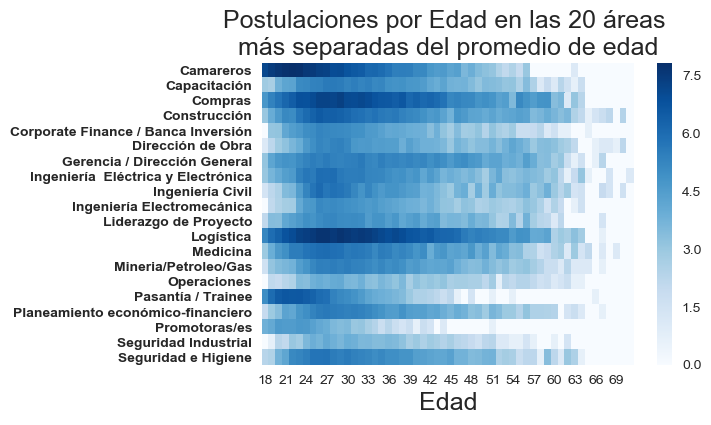

In [18]:
g = sns.heatmap(tabla,  cmap="Blues")
g.set_title("Postulaciones por Edad en las 20 áreas \nmás separadas del promedio de edad", fontsize=18)
g.set_yticklabels(g.get_yticklabels(), fontsize=10, weight='bold')
g.set_xlabel("Edad",fontsize=18)
g.set_ylabel("", fontsize=18)

Text(47.316,0.5,'')

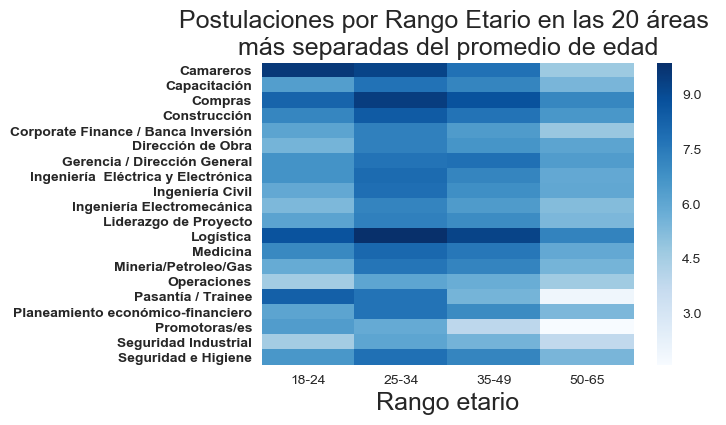

In [19]:
tabla2 = post_filtrada_desiguales.pivot_table(index='nombre_area', columns='rango', values='edad', aggfunc='count')
tabla2.drop('error',axis=1,inplace=True);
tabla2.fillna(0,inplace=True);
tabla2=tabla2.applymap(lambda x: 0 if x==0 else np.log(x));
g = sns.heatmap(tabla2,  cmap="Blues")
g.set_yticklabels(g.get_yticklabels(), fontsize=10, weight='bold')
g.set_title("Postulaciones por Rango Etario en las 20 áreas \nmás separadas del promedio de edad", fontsize=18)
g.set_xlabel("Rango etario",fontsize=18)
g.set_ylabel("", fontsize=18)

Text(47.316,0.5,'')

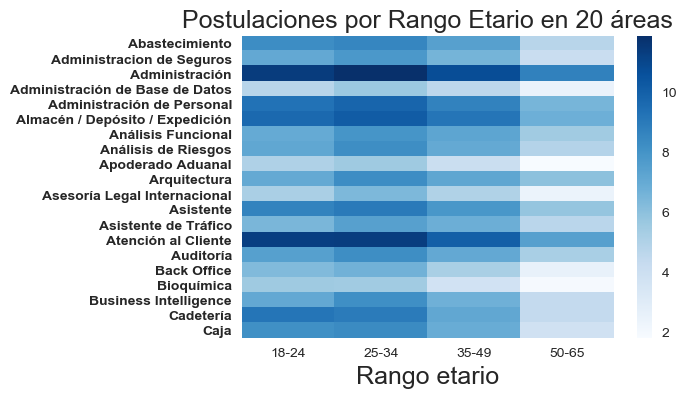

In [20]:
post_filtrada_no_desiguales=postulaciones_completas[~postulaciones_completas['nombre_area'].isin(areas_por_edad.iloc[:20].nombre_area.values)];
tabla3 = post_filtrada_no_desiguales.pivot_table(index='nombre_area', columns='rango', values='edad', aggfunc='count')
tabla3.drop('error',axis=1,inplace=True);
tabla3.fillna(0,inplace=True);
tabla3 = tabla3.applymap(lambda x: 0 if x==0 else np.log(x));

tabla3 = tabla3.iloc[:20];
g = sns.heatmap(tabla3,  cmap="Blues")
g.set_yticklabels(g.get_yticklabels(), fontsize=10, weight='bold')
g.set_title("Postulaciones por Rango Etario en 20 áreas", fontsize=18)
g.set_xlabel("Rango etario",fontsize=18)
g.set_ylabel("", fontsize=18)

In [21]:
tabla4 = post_filtrada_no_desiguales.pivot_table(index='nombre_area', columns='edad_string', values='edad', aggfunc='count');
tabla4.drop(['0','12','17','73','75','100','96','242'],axis=1,inplace=True);


Text(47.316,0.5,'')

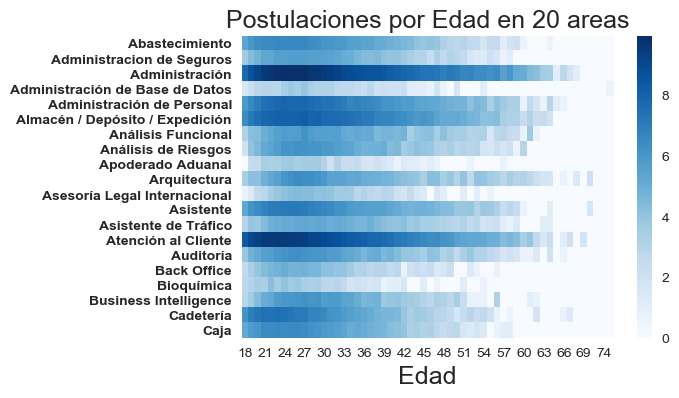

In [22]:
tabla4.fillna(0,inplace=True);
tabla4=tabla4.applymap(lambda x: 0 if x==0 else np.log(x));
tabla4 = tabla4.iloc[:20];

g = sns.heatmap(tabla4,  cmap="Blues")
g.set_title("Postulaciones por Edad en 20 areas", fontsize=18)
g.set_yticklabels(g.get_yticklabels(), fontsize=10, weight='bold')
g.set_xlabel("Edad",fontsize=18)
g.set_ylabel("", fontsize=18)

In [23]:
area_por_edad_nuevo=areas_por_edad.iloc[:20];
area_por_edad_nuevo.loc[-1]=['Promedio de todas las Postulaciones',promedio_edad,0,0];
area_por_edad_nuevo.sort_values('edad', ascending=False, inplace=True);
area_por_edad_nuevo

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,nombre_area,edad,cantidad_postulantes,distancia_del_promedio
46,Dirección de Obra,35.284053,3010,7.045118
70,Gerencia / Dirección General,35.153573,6186,6.914637
113,Operaciones,34.715455,977,6.476520
100,Liderazgo de Proyecto,33.449829,3219,5.210894
83,Ingeniería Electromecánica,33.241509,2385,5.002574
109,Mineria/Petroleo/Gas,33.019956,4109,4.781021
82,Ingeniería Civil,32.884871,4369,4.645935
23,Capacitación,32.597630,4389,4.358695
137,Seguridad Industrial,32.545241,851,4.306305
121,Planeamiento económico-financiero,32.537792,4022,4.298857


Text(0.5,0,'Edad')

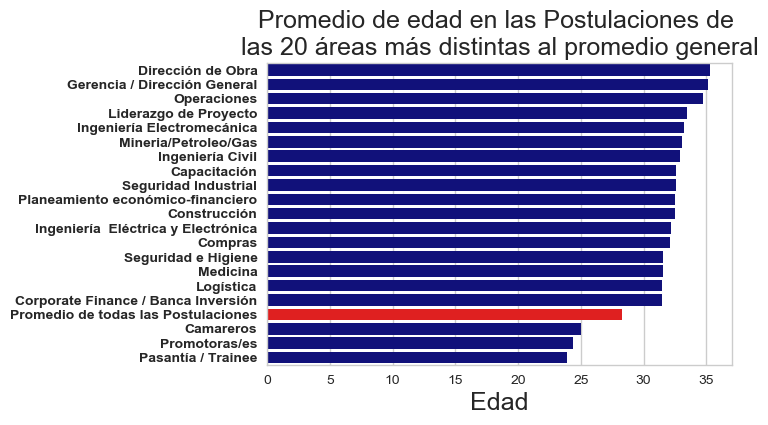

In [29]:
colores=['darkblue','darkblue','darkblue','darkblue','darkblue','darkblue','darkblue','darkblue','darkblue','darkblue','darkblue','darkblue','darkblue','darkblue','darkblue','darkblue','darkblue','red']
g = sns.barplot(y="nombre_area",x="edad",data=area_por_edad_nuevo, orient='h', palette=colores)
g.set_title("Promedio de edad en las Postulaciones de \nlas 20 áreas más distintas al promedio general", fontsize=18)
g.set_yticklabels(g.get_yticklabels(), weight='bold')
g.set_ylabel("",fontsize=18)
g.set_xlabel("Edad", fontsize=18)